### Example Dataset Tidying in Python
#### Using EuroStat's Time Use Dataset (and possibly others)
##### By Joshua Megnauth

Cleaning datasets consumes a large part of a data scientist's time as we discussed in the notes. **Tidy data** is a concept developed by [Hadley Wickham](http://hadley.nz/). You can read Wickham's paper introducing tidy data [here as LaTex](https://github.com/hadley/tidy-data/blob/master/tidy-data.tex) or [here as a PDF](https://vita.had.co.nz/papers/tidy-data.pdf). This concept provides a standardized way to view and use data. Tidy data is generally easier to analyze due to the proliferation of tools that work with the tidy format.

The **three principles** of tidy data are as follows (n.b. copied directly from Wickham's paper):
1.  Each variable forms a column.
2.  Each observation forms a row.
3.  Each type of observational unit forms a table.

I will provide some examples of tidying and preparing data using Python for practice and future reference in this notebook. I don't guarantee that the work below is perfect nor examples of the best way to tidy data. Regardless, I hope this comes in handy to anyone who encounters it.

#### EuroStat's Time Use Dataset
[Official site](http://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=tus_00week&lang=en)

[Copy I used](https://perso.telecom-paristech.fr/eagan/class/igr204/data/TimeUse.csv)

#### Loading and preprocessing the data
Let us jump right into the first example. We start by importing [Pandas](https://pandas.pydata.org/) and loading our dataset into a variable using the [pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function.

I'll also import Seaborn and matplotlib since we'll need those later.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

timeuse_df = pd.read_csv("https://perso.telecom-paristech.fr/eagan/class/igr204/data/TimeUse.csv")

Our next step is to explore the data. Datasets often come in different shapes and sizes depending on how the data was collected as well as how the data was intended to be displayed. Practices that facilitate entering, observing, and storing data may differ from data that is shaped to be analyzed. We will see this with the Time Use dataset.

Datasets should always be poked and prodded in order to understand the shape of the data. Observing how many columns a dataset has, the amount of nulls, the data types, the representation of the data, violations of the tidy data principles, et cetera is imperative to **preprocessing and cleaning.** Exploring your dataset grants a visual of exactly what is broken and thus the tasks required to fix those problems.

Some of the [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) and [pandas.Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html) attributes and methods that are useful for exploring datasets include:
* [pandas.DataFrame.dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html#pandas.DataFrame.dtypes)
* [pandas.DataFrame.columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html#pandas.DataFrame.columns)
* [pandas.DataFrame.info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info)
* [pandas.DataFrame.head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head)
* [pandas.DataFrame.tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail)

_Note that the attributes and methods listed above are not exhaustive. Many of the DataFrame functions are also available for Series as well. Check the documentation for more details!_

In [17]:
display(timeuse_df.head())
timeuse_df.info()

,SEX,GEO/ACL00,Total,Personal care,Sleep,Eating,Other and/or unspecified personal care,"Employment, related activities and travel as part of/during main and second job",Main and second job and related travel,Activities related to employment and unspecified employment,...,Unspecified leisure,Travel except travel related to jobs,Travel to/from work,Travel related to study,Travel related to shopping and services,Transporting a child,Travel related to other household purposes,"Travel related to leisure, social and associative life",Unspecified travel,Unspecified time use
0,Males,Belgium,24:00,10:45,8:15,1:49,0:42,3:07,3:05,0:02,...,0:01,1:30,0:25,0:02,0:16,0:03,0:00,0:15,0:30,0:01
1,Males,Bulgaria,24:00,11:54,9:08,2:07,0:39,3:32,3:27,0:04,...,0:01,1:07,0:23,0:00,0:12,0:01,0:06,0:21,0:03,0:02
2,Males,Germany (including former GDR from 1991),24:00,10:40,8:08,1:43,0:49,3:27,3:21,0:06,...,0:00,1:29,0:27,0:02,0:16,0:02,0:05,0:34,0:03,0:05
3,Males,Estonia,24:00,10:35,8:24,1:19,0:52,4:27,4:20,0:07,...,0:00,1:12,0:28,0:01,0:13,0:01,0:07,0:22,0:01,0:04
4,Males,Spain,24:00,11:11,8:36,1:47,0:48,4:21,4:17,0:03,...,0:00,1:16,0:31,0:02,0:07,0:02,0:03,0:28,0:02,0:02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 58 columns):
SEX                                                                                28 non-null object
GEO/ACL00                                                                          28 non-null object
Total                                                                              28 non-null object
Personal care                                                                      28 non-null object
Sleep                                                                              28 non-null object
Eating                                                                             28 non-null object
Other and/or unspecified personal care                                             28 non-null object
Employment, related activities and travel as part of/during main and second job    28 non-null object
Main and second job and related travel                                           

Wow! Two simple functions expose a glut of problems that would impede analysis for tools that require tidy data.

One major problem is that the data is **not tidy**. Each column is not a variable. We essentially have _four variables_: sex, state (country), activity, and time. The activity variable is split into multiple columns. Well, multiple is a bit of a misnomer. Activity is split into **more than fifty columns**!

The next major problem is that the type information is entirely wrong. Sex, state, and the activity columns are categorical variables rather than strings. More importantly, the values of the time variable are encoded as strings in the format **hours:minutes**. Analyzing data encoded in that way is impossible to analyze directly. Instead, the strings must be parsed and processed.

A few miscellaneous problems exist as well. The sex column's categories are listed as "Males" and "Females" which sounds clunky. The column title "GEO/ACL00" is egregious by the fact that is extremely annoying to type, code completion aside. The dataset has a "Total" column which indicates that the times for the activities add up to 24 hours (or at least _should_). The "Total" column is useful to note missing data. However, the dataset is missing values so I'm not entirely sure if the column has a purpose.

#### Melting Time Use
The function [pandas.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) solves our first major problem simply and effectively. Melting datasets collapses columns into variables and values. Melting a dataset may initially seem terrifying because of the radical changes that occur. However, the process is easy to grok once seen in action.

The melt function takes in a few arguments.
* id_vars: These are the columns melt won't touch. You can pass in a list of column names or a single column as a string.
* value_vars: This argument is the opposite of id_vars; any column passed to this will be melted. By default all columns not passed to id_vars are melted which is great for laziness!
* var_name: Name the new variable/column created from melting; "variable" by default.
* value_name: Name the column that holds the values from the melted columns; "value" by default.

So, melt collapses the columns passed to value_vars (or the columns _not_ passed to id_vars is value_vars is None). The column names becomes the values of the new column which is given the name passed to var_name. The values are the values from the value_vars columns which are matched to the var_name column. This is hard to explain and the concept was confusing at first. Keep the above in mind when looking at the melted DataFrame below.

In [18]:
display((timeuse_df.Total != "24:00").sum())

timeuse_df.drop(columns="Total", inplace=True)
timeuse_df = timeuse_df.melt(id_vars=["SEX", "GEO/ACL00"], var_name="activity", value_name="time")

display(timeuse_df.head(10))

0

,SEX,GEO/ACL00,activity,time
0,Males,Belgium,Personal care,10:45
1,Males,Bulgaria,Personal care,11:54
2,Males,Germany (including former GDR from 1991),Personal care,10:40
3,Males,Estonia,Personal care,10:35
4,Males,Spain,Personal care,11:11
5,Males,France,Personal care,11:44
6,Males,Italy,Personal care,11:16
7,Males,Latvia,Personal care,10:46
8,Males,Lithuania,Personal care,10:53
9,Males,Poland,Personal care,10:44


The molten DataFrame has a new column, activity, that coalsces the columns from the wide dataset. The former columns are now the values of the activity variable with the corresponding times listed as well. The activity column can be easily filtered for analysis or plots. Notably, the molten DataFrame is infinitely harder to read than the wider dataset. Wide data can be more readable at the expense of ease of use. 

We still have some problems that need to be fixed in order to make working with this dataset even easier. First, I will rename the columns so I don't have to type GEO-whatever each time. Renaming the columns is as simple as setting the [columns attribute](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) of the DataFrame equal to a list of the new names. The length of the list replacing columns must be equal to the number of columns.

In [19]:
timeuse_df.columns = ["sex", "state", "activity", "time"]
display(timeuse_df.head())

,sex,state,activity,time
0,Males,Belgium,Personal care,10:45
1,Males,Bulgaria,Personal care,11:54
2,Males,Germany (including former GDR from 1991),Personal care,10:40
3,Males,Estonia,Personal care,10:35
4,Males,Spain,Personal care,11:11


Whew. The new column names look easier to use.

Next I'll rename the values of the sex column from Males/Females to Male/Female. I'm not sure if Males/Females is grammatically incorrect in the case of this dataset, but I said I'd rename them earlier so I might as well! Pandas' [map()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html#pandas.Series.map) method easily solves this problem. Among other arguments, map may take in a dictionary where the key-value pairs are the old values as keys and the new values as values. That dictionary is mapped across a Series replacing old values (keys) with the new values.

Map creates and modifies a copy of the Series.

In [20]:
timeuse_df["sex"] = timeuse_df["sex"].map({"Males": "Male",
                                          "Females": "Female"})

display(timeuse_df.head())

,sex,state,activity,time
0,Male,Belgium,Personal care,10:45
1,Male,Bulgaria,Personal care,11:54
2,Male,Germany (including former GDR from 1991),Personal care,10:40
3,Male,Estonia,Personal care,10:35
4,Male,Spain,Personal care,11:11


I'm not entirely sure if renaming the values above had a point, but _what's done is done_.

The columns sex, state, and activity are still strings. We can typecast these columns to categoricals to save space as well as speed up certain operations.

The loop below spans every column except time. I use [pandas.DataFrame.astype()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) to cast the entire column to the categorical type.

In [21]:
for col in timeuse_df.columns[:-1]:
    timeuse_df[col] = timeuse_df[col].astype("category")

timeuse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 4 columns):
sex         1540 non-null category
state       1540 non-null category
activity    1540 non-null category
time        1540 non-null object
dtypes: category(3), object(1)
memory usage: 20.4+ KB


The sex, state, and activity columns are now categoricals! Finally, we must fix the very mangled time column.

Time consists of strings. We can't parse them as numerical types using a Pandas function because of the colon. However, the time column represents, well, _time_; thus we can convert the column to the DateTime type then clean it up from there.

In [22]:
timeuse_df["time"] = pd.to_datetime(timeuse_df["time"], errors="coerce")
timeuse_df["time"] = timeuse_df["time"].dt.minute + timeuse_df["time"].dt.hour * 60

timeuse_df.info()
display(timeuse_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 4 columns):
sex         1540 non-null category
state       1540 non-null category
activity    1540 non-null category
time        1522 non-null float64
dtypes: category(3), float64(1)
memory usage: 20.4 KB


,sex,state,activity,time
0,Male,Belgium,Personal care,645.0
1,Male,Bulgaria,Personal care,714.0
2,Male,Germany (including former GDR from 1991),Personal care,640.0
3,Male,Estonia,Personal care,635.0
4,Male,Spain,Personal care,671.0


An easy way to fix the time column is to convert it to DateTimes then convert those to minutes. I passed "coerce" to the errors argument because one row has a blank ":" instead of a time. Coerce converts invalid observations to null values.

Converting to DateTimes leaves us with objects that represent a specific time on the current day - not at all what we want in that column! Thus, we convert that column to minutes manually.

Now we have a relatively clean and tidy dataset! Yay! This allows us to easily generate plots and analyze the data. Doing so was effectively impossible with the unclean dataset.

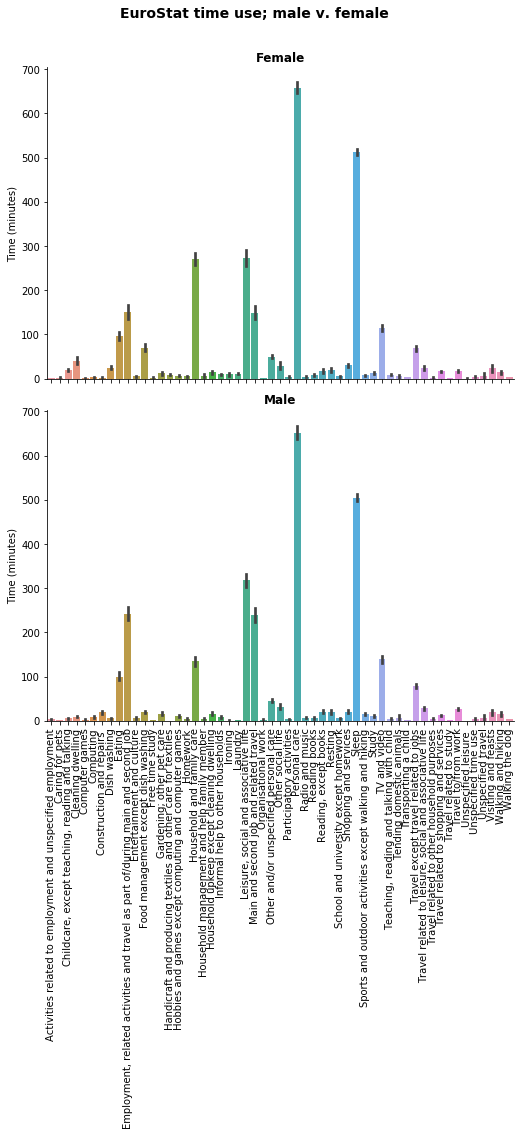

In [52]:
g = sns.catplot(x="activity", y="time", data=timeuse_df, row="sex", kind="bar")
g.fig.set_figwidth(20)
g.fig.suptitle("EuroStat time use; male v. female", x=.6, y=1.05, size=14, weight="bold")

for axes_array in g.axes:
    for ax in axes_array:
        ax.set_ylabel("Time (minutes)")
        ax.set_xlabel("")
        ax.set_title(ax.get_title().split(' ')[-1], weight="bold")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)